 # MNIST with pytorch

In [1]:
import torch
import numpy
import matplotlib.pyplot as plt
import torch.nn as nn

In [2]:
torch.cuda.is_available()

True

In [253]:
import torchvision.datasets as datasets
import torchvision
from torch.utils.data import DataLoader
import torch.nn.functional as F
import torch.optim as optim

## Load the data

In [4]:
batch_size = 8192
validation_size = 10000

In [5]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True,transform=torchvision.transforms.ToTensor())
mnist_trainset,mnist_valset = torch.utils.data.random_split(mnist_trainset, [len(mnist_trainset)-10000,10000])
mnist_testset = datasets.MNIST(root='./data', train=False, download=True,transform=torchvision.transforms.ToTensor())

In [6]:
mnist_trainset[0][0].shape

torch.Size([1, 28, 28])

In [7]:
mnist_trainset

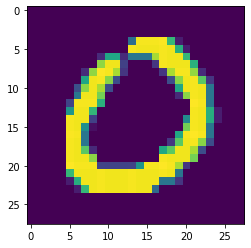

In [8]:
plt.imshow(mnist_trainset[0][0][0])

In [9]:
train_loader = DataLoader(
    mnist_trainset,
    num_workers=2,
    batch_size=batch_size,
    shuffle=True
)

In [170]:
batch_idx, (example_data, example_targets) = next(enumerate(train_loader))

## define the neural net

In [381]:
class Model1(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 20, kernel_size=5, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2,padding=0)
        self.linear1 = nn.Linear(13*13*20,100) 
        self.linear2 = nn.Linear(100,10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool1(x)
        x = self.linear1(x.view(-1,13*13*20))
        x = self.linear2(x)
        return x

In [382]:
model = Model1()

In [385]:
model(example_data[0:4]).shape

torch.Size([4, 10])

In [386]:
optimizer = optim.SGD(model.parameters(), lr=1e-3,momentum=0.9)
loss_func = nn.CrossEntropyLoss() 

We are using CrossEntropyLoss() it did the softmax so ne need to add it in the model

In [379]:
loss_func(model(example_data[0:1]),example_targets[0:1])

tensor(2.4072, grad_fn=<NllLossBackward>)

In [387]:
epochs = 1
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = loss_func(output, target)
        loss.backward()
        optimizer.step()
        
        print('Epoch {}, Batch idx {}, loss {}'.format(
            epoch, batch_idx, loss.item()))

Epoch 0, Batch idx 0, loss 2.3093512058258057
Epoch 0, Batch idx 1, loss 2.3106179237365723
Epoch 0, Batch idx 2, loss 2.309898614883423
Epoch 0, Batch idx 3, loss 2.308476209640503
Epoch 0, Batch idx 4, loss 2.305948257446289
Epoch 0, Batch idx 5, loss 2.3059380054473877
Epoch 0, Batch idx 6, loss 2.3007829189300537
